# Qiskit 1.x Tutorial 3 Hello World

&copy; 2024 by [Damir Cavar](http://damir.cavar.me/)


This tutorial and example code is based on the Qiskit 1.x tutorial videos.

- [Tutorial 3: Hello World](https://youtu.be/93-zLTppFZw)

It describes the Hello World example implementation on a 2-qubit Bell state.

Install the necessary Qiskit packages for the tutorials using:

In [ ]:
!pip install -U --user qiskit
!pip install -U --user qiskit_ibm_runtime
!pip install -U --user qiskit_aer
!pip install -U --user matplotlib
!pip install -U --user pylatexenc

The following imports the Qiskit Python module and a local file called `secret.py`. In the `secret.py` file I tend to store my API key. It is excluded from the repo via an entry in the file `.gitignore`.

In [10]:
import qiskit
import secret

The following import enables the Qiskit runtime service using `ibm_quantum` to communicate with the IBM Quantum computer. To be able to use the service you need an account with [IBM Quantum](https://quantum.ibm.com/) and the API token.

In [11]:
from qiskit_ibm_runtime import QiskitRuntimeService

In the following code box we connect to the IBM Quantum service using our API token:

In [4]:
service = QiskitRuntimeService(channel="ibm_quantum", # or ibm_cloud
                               token=secret.api_key_ibm_q)

To save the account information locally in the Python and Qiskit environment so that one does not need to provide it anymore during coding sessions, run this:

In [5]:
QiskitRuntimeService.save_account(channel="ibm_quantum",
                                  token=secret.api_key_ibm_q)

The code above will store the API token in your local Python environment, either in your account or a `virtualenv` environment.

The following code establishes a connection to one of the IBM Quantum computers. On your IBM Quantum Platform select Systems in the menu and check out the different servers available to you.

In [6]:
backend = service.backend(name="ibm_brisbane")

## Generating the Bell state

We apply the [Hadamard gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.HGate) on the first qubit and the [CX gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#cx) (or CNOT gate) to the first and second qubits.

Creating a quantum circuit with 2 qubits:

In [3]:
qc = qiskit.QuantumCircuit(2)

The first qubit is put into a superposition by applying the [Hadamard gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.HGate). Executing the single qubit [Hadamard gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.HGate) on the first qubit:

In [4]:
qc.h(0)

The [CX gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#cx) uses the first qubit as a control qubit and the second as the target qubit.

In [5]:
qc.cx(0, 1)

We can draw the circuit using the following [QuantumCircuit draw](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#draw) function:

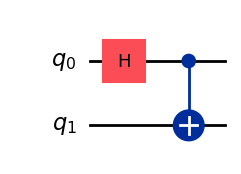

In [8]:
x = qc.draw(output='mpl')

What does this mean? The Bell state is a specific type of an entangled quantum state with two qubits. Quoting [Pennylane](https://pennylane.ai/qml/glossary/what-are-bell-states/): "Bell states are quantum states of two qubits that represent simple examples of quantum entanglement. When one of the two qubits is measured, it takes on a specific value, and the second qubit is forced to also take on a specific value, as the entangled state collapses. (...) If qubit `x` starts with a state of `|0⟩`, the Hadamard gate puts it into a superposition of `|0⟩` and `|1⟩`. The CNOT gate flips qubit `y` depending on the state of qubit `x`, but since qubit `x` is in a superposition of `|0⟩` and `|1⟩` this makes the final state of qubit `y` dependent on what the final state of qubit `x` turns out to be — thus the two qubits are part of an entangled state."